In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42361 entries, 0 to 42360
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           42361 non-null  float64
 1   year              42361 non-null  int64  
 2   acousticness      42361 non-null  float64
 3   artists           42361 non-null  object 
 4   danceability      42361 non-null  float64
 5   duration_ms       42361 non-null  int64  
 6   energy            42361 non-null  float64
 7   explicit          42361 non-null  int64  
 8   id                42361 non-null  object 
 9   instrumentalness  42361 non-null  float64
 10  key               42361 non-null  int64  
 11  liveness          42361 non-null  float64
 12  loudness          42360 non-null  float64
 13  mode              42360 non-null  float64
 14  name              42360 non-null  object 
 15  popularity        42360 non-null  float64
 16  release_date      42360 non-null  object

In [4]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [5]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


In [7]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()

print("Missing values in X:", missing_values_X)
print("Missing values in y:", missing_values_y)

Missing values in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            1
speechiness         1
tempo               1
valence             0
duration_ms         0
explicit            0
key                 0
mode                1
year                0
dtype: int64
Missing values in y: 1


In [8]:
infinite_values_X = np.isinf(X).sum()
infinite_values_y = np.isinf(y).sum()

print("Infinite values in X:", infinite_values_X)
print("Infinite values in y:", infinite_values_y)

Infinite values in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Infinite values in y: 0


In [9]:
infinite_values_X = np.isinf(X).sum()
infinite_values_y = np.isinf(y).sum()

print("Infinite values in X:", infinite_values_X)
print("Infinite values in y:", infinite_values_y)

Infinite values in X: acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
duration_ms         0
explicit            0
key                 0
mode                0
year                0
dtype: int64
Infinite values in y: 0


In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

In [11]:
X[np.isinf(X)] = np.nan
y[np.isinf(y)] = np.nan

X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [12]:
visualizer.fit(X, y)
visualizer.show()

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

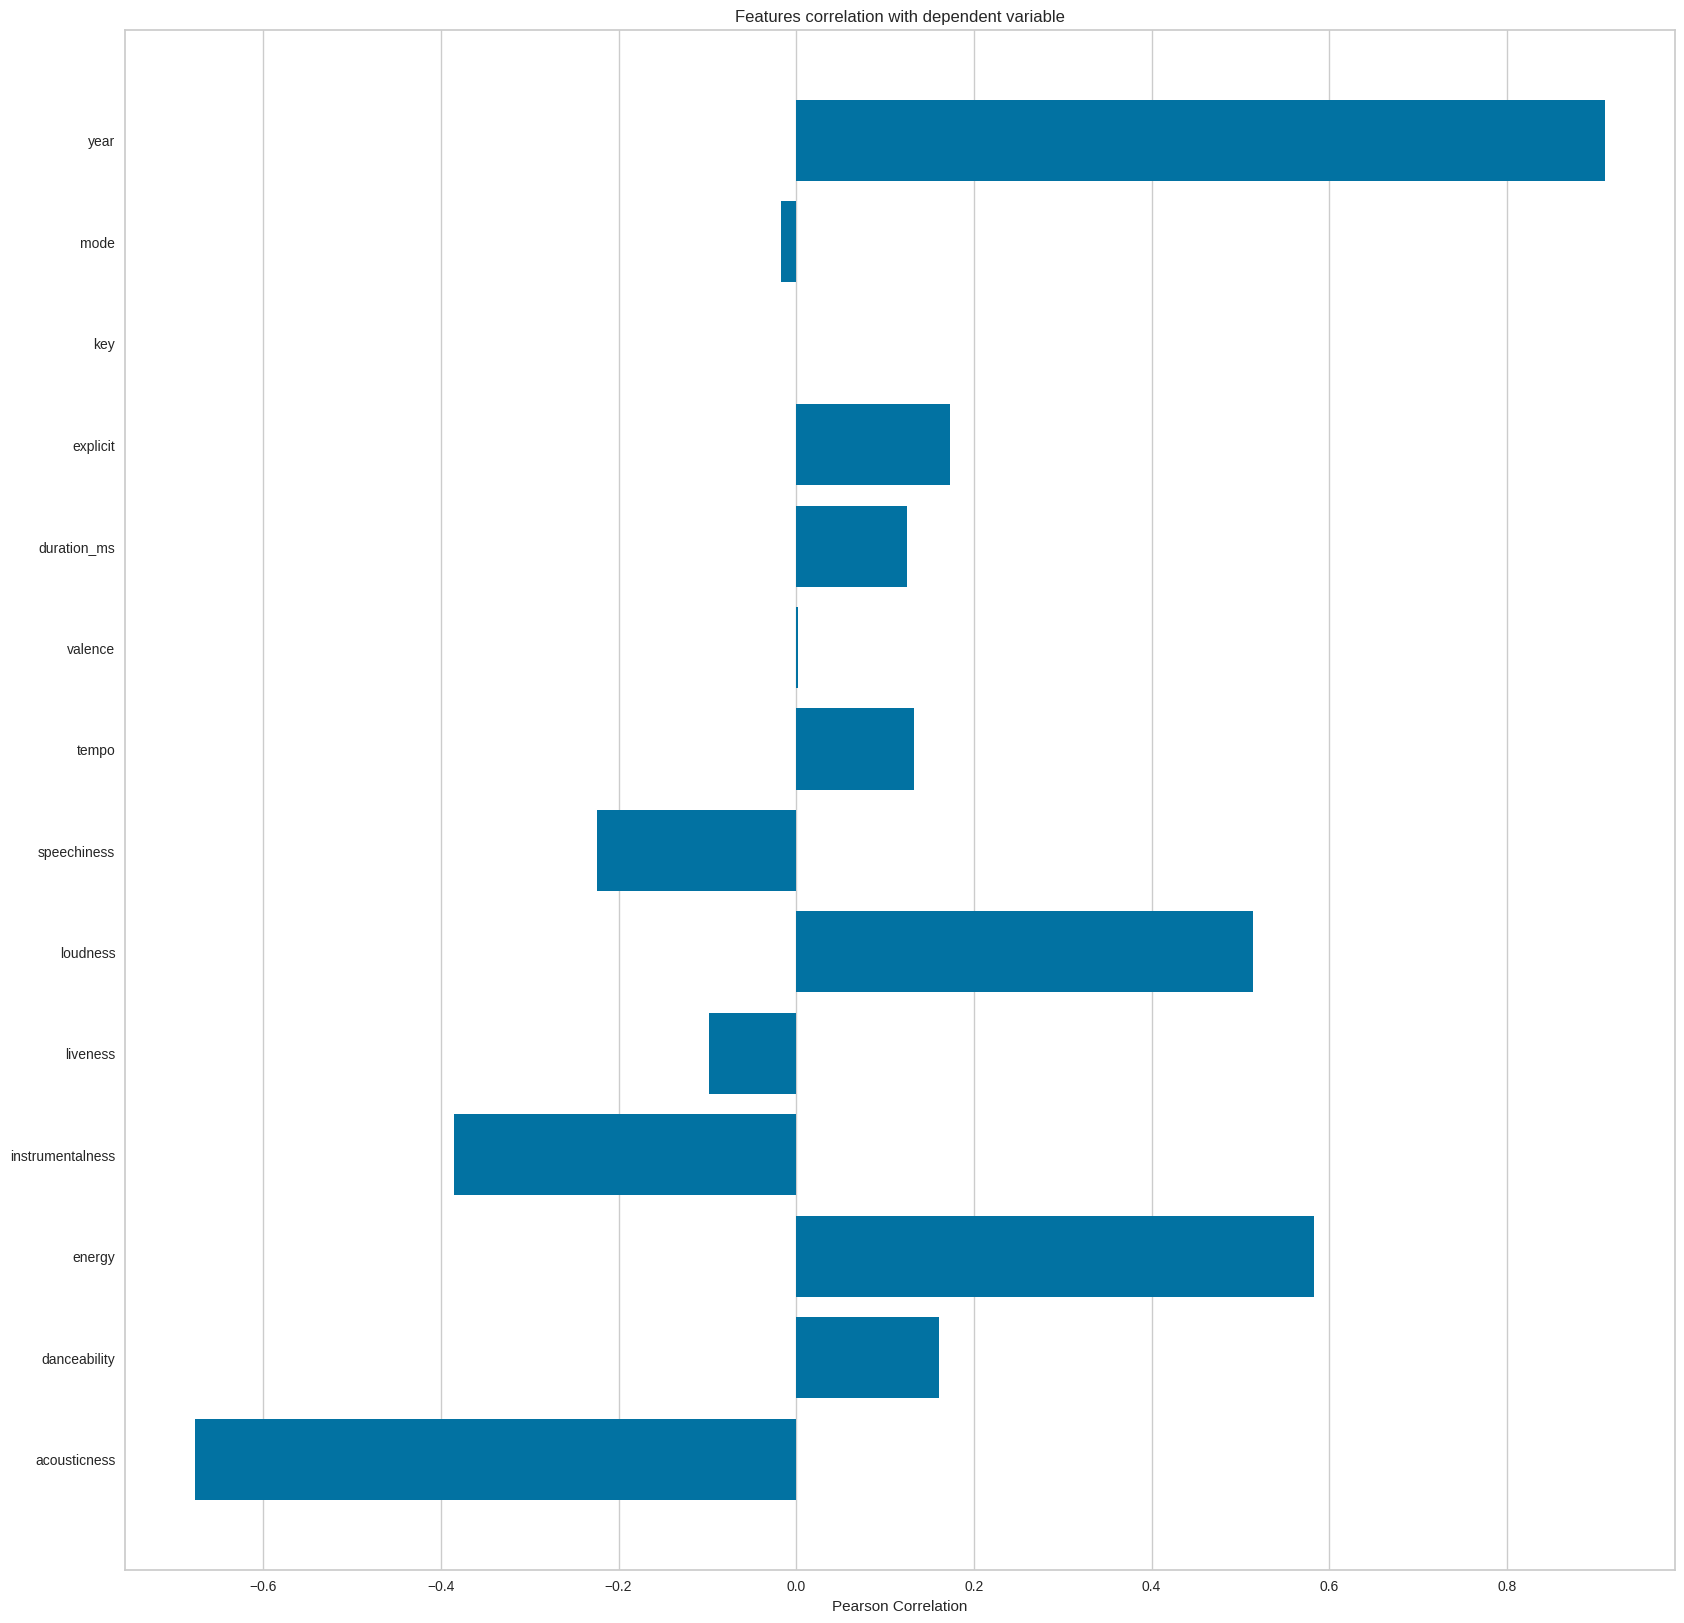

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
import numpy as np
import pandas as pd
from yellowbrick.target import FeatureCorrelation

# Identify and handle missing or infinite values
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define feature names and target
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']
X = data_clean[feature_names]
y = data_clean['popularity']

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=feature_names)

# Plot
plt.rcParams['figure.figsize'] = (20, 20)
visualizer.fit(X, y)
visualizer.show()


<Axes: xlabel='count', ylabel='decade'>

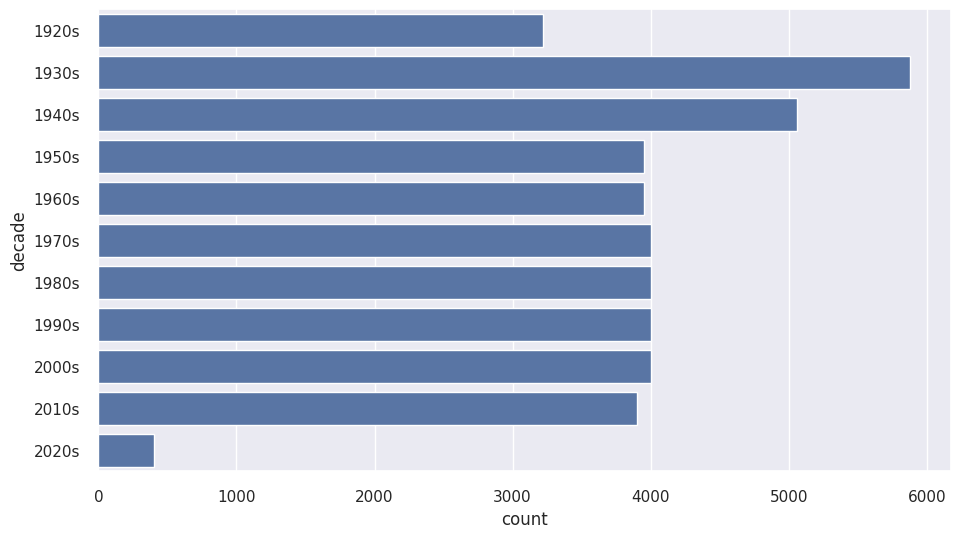

In [16]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [17]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [18]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Remove n_jobs parameter from KMeans instantiation
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [21]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106262
[t-SNE] KL divergence after 1000 iterations: 1.392294


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from joblib import parallel_backend

# Define the pipeline with imputation
song_cluster_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can choose a different strategy if needed
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=20))
])

# Select only numerical columns for clustering
X = data.select_dtypes(np.number)

# Fit the pipeline with imputation
with parallel_backend('threading', n_jobs=4):
    song_cluster_labels = song_cluster_pipeline.fit_predict(X)

# Assign cluster labels to the original data
data['cluster_label'] = song_cluster_labels

In [26]:
print(data.isnull().sum())

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            1
mode                1
name                1
popularity          1
release_date        1
speechiness         1
tempo               1
decade              0
cluster_label       0
dtype: int64


In [28]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42360 entries, 0 to 42359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           42360 non-null  float64
 1   year              42360 non-null  int64  
 2   acousticness      42360 non-null  float64
 3   artists           42360 non-null  object 
 4   danceability      42360 non-null  float64
 5   duration_ms       42360 non-null  int64  
 6   energy            42360 non-null  float64
 7   explicit          42360 non-null  int64  
 8   id                42360 non-null  object 
 9   instrumentalness  42360 non-null  float64
 10  key               42360 non-null  int64  
 11  liveness          42360 non-null  float64
 12  loudness          42360 non-null  float64
 13  mode              42360 non-null  float64
 14  name              42360 non-null  object 
 15  popularity        42360 non-null  float64
 16  release_date      42360 non-null  object

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954,1920s,13
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936,1920s,1
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339,1920s,13
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109,1920s,15
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665,1920s,15


In [29]:
numeric_data = data.select_dtypes(include=["number"])

In [30]:
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(numeric_data)

In [31]:
data["valence"] = data["valence"]
data[numeric_data.columns] = imputed_data

In [32]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42360 entries, 0 to 42359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           42360 non-null  float64
 1   year              42360 non-null  float64
 2   acousticness      42360 non-null  float64
 3   artists           42360 non-null  object 
 4   danceability      42360 non-null  float64
 5   duration_ms       42360 non-null  float64
 6   energy            42360 non-null  float64
 7   explicit          42360 non-null  float64
 8   id                42360 non-null  object 
 9   instrumentalness  42360 non-null  float64
 10  key               42360 non-null  float64
 11  liveness          42360 non-null  float64
 12  loudness          42360 non-null  float64
 13  mode              42360 non-null  float64
 14  name              42360 non-null  object 
 15  popularity        42360 non-null  float64
 16  release_date      42360 non-null  object

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
0,0.0594,1921.0,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954,1920s,13.0
1,0.9630,1921.0,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1.0,Clancy Lowered the Boom,5.0,1921,0.4150,60.936,1920s,1.0
2,0.0394,1921.0,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062.0,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1.0,Gati Bali,5.0,1921,0.0339,110.339,1920s,13.0
3,0.1650,1921.0,0.967,['Frank Parker'],0.275,210000.0,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1.0,Danny Boy,3.0,1921,0.0354,100.109,1920s,15.0
4,0.2530,1921.0,0.957,['Phil Regan'],0.418,166693.0,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665,1920s,15.0


In [33]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 6.4 MB/s eta 0:00:00


In [35]:
import os

# Set up Spotify API credentials
os.environ["SPOTIFY_CLIENT_ID"] = "your_client_id"
os.environ["SPOTIFY_CLIENT_SECRET"] = "your_client_secret"

# Now initialize Spotify client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))

In [37]:
import os

# Set up Spotify API credentials
os.environ["SPOTIFY_CLIENT_ID"] = "your_client_id"
os.environ["SPOTIFY_CLIENT_SECRET"] = "your_client_secret"

In [39]:
%env SPOTIFY_CLIENT_ID=your_client_id
%env SPOTIFY_CLIENT_SECRET=your_client_secret

env: SPOTIFY_CLIENT_ID=your_client_id
env: SPOTIFY_CLIENT_SECRET=your_client_secret


In [40]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.environ["SPOTIFY_CLIENT_ID"],
                                                           client_secret=os.environ["SPOTIFY_CLIENT_SECRET"]))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [41]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [43]:
!pip install spotipy

In [44]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [45]:
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [46]:
def get_song_data(song, spotify_data):
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    except IndexError:
        return None

In [47]:
def find_song(name, year):
    results = sp.search(q='track: {} year: {}'.format(name, year), limit=1)
    if results['tracks']['items'] == []:
        return None
    else:
        track = results['tracks']['items'][0]
        song_data = {
            'name': track['name'],
            'year': track['album']['release_date'][:4],
            'id': track['id']
        }
        return song_data

In [48]:
recommend_songs([{'name': 'Come As You Are', 'year':1991},
                {'name': 'Smells Like Teen Spirit', 'year': 1991},
                {'name': 'Lithium', 'year': 1992},
                {'name': 'All Apologies', 'year': 1993},
                {'name': 'Stay Away', 'year': 1993}],  data)

[{'name': '恋愛サーキュレーション', 'year': 2018.0, 'artists': "['物語シリーズ']"},
 {'name': 'Rise Up', 'year': 2015.0, 'artists': "['Andra Day']"},
 {'name': 'Show Me Love', 'year': 1993.0, 'artists': "['Robin S']"},
 {'name': 'Bad Boy for Life',
  'year': 2001.0,
  'artists': "['Diddy', 'Black Rob', 'Mark Curry']"},
 {'name': 'Ice Ice Baby', 'year': 2008.0, 'artists': "['Vanilla Ice']"},
 {'name': 'Lay Me Down', 'year': 2014.0, 'artists': "['Sam Smith']"},
 {'name': 'Parachute', 'year': 2015.0, 'artists': "['Chris Stapleton']"},
 {'name': 'Young Hearts Run Free',
  'year': 1976.0,
  'artists': "['Candi Staton']"},
 {'name': 'Hungry Eyes - From "Dirty Dancing" Soundtrack',
  'year': 1997.0,
  'artists': "['Eric Carmen']"},
 {'name': 'Rayando El Sol', 'year': 1990.0, 'artists': "['Maná']"}]

In [49]:
[{'name': 'Life is a Highway - From "Cars"',
  'year': 2009,
  'artists': "['Rascal Flatts']"},
 {'name': 'Of Wolf And Man', 'year': 1991, 'artists': "['Metallica']"},
 {'name': 'Somebody Like You', 'year': 2002, 'artists': "['Keith Urban']"},
 {'name': 'Kayleigh', 'year': 1992, 'artists': "['Marillion']"},
 {'name': 'Little Secrets', 'year': 2009, 'artists': "['Passion Pit']"},
 {'name': 'No Excuses', 'year': 1994, 'artists': "['Alice In Chains']"},
 {'name': 'Corazón Mágico', 'year': 1995, 'artists': "['Los Fugitivos']"},
 {'name': 'If Today Was Your Last Day',
  'year': 2008,
  'artists': "['Nickelback']"},
 {'name': "Let's Get Rocked", 'year': 1992, 'artists': "['Def Leppard']"},
 {'name': "Breakfast At Tiffany's",
  'year': 1995,
  'artists': "['Deep Blue Something']"}]

[{'name': 'Life is a Highway - From "Cars"',
  'year': 2009,
  'artists': "['Rascal Flatts']"},
 {'name': 'Of Wolf And Man', 'year': 1991, 'artists': "['Metallica']"},
 {'name': 'Somebody Like You', 'year': 2002, 'artists': "['Keith Urban']"},
 {'name': 'Kayleigh', 'year': 1992, 'artists': "['Marillion']"},
 {'name': 'Little Secrets', 'year': 2009, 'artists': "['Passion Pit']"},
 {'name': 'No Excuses', 'year': 1994, 'artists': "['Alice In Chains']"},
 {'name': 'Corazón Mágico', 'year': 1995, 'artists': "['Los Fugitivos']"},
 {'name': 'If Today Was Your Last Day',
  'year': 2008,
  'artists': "['Nickelback']"},
 {'name': "Let's Get Rocked", 'year': 1992, 'artists': "['Def Leppard']"},
 {'name': "Breakfast At Tiffany's",
  'year': 1995,
  'artists': "['Deep Blue Something']"}]